<a href="https://colab.research.google.com/github/Han1018/BeatGAN/blob/main/Results/CollectRef.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Drum in pattern rate

In [3]:
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir("/content/drive/MyDrive/museGan") #更改路徑
dir='/content/drive/MyDrive/museGan'
os.getcwd() #查看當前路徑

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


'/content/drive/MyDrive/museGan'

In [2]:
import numpy as np
import glob2 as gb

In [28]:
folderPath = './eval_popRock/drum_in_pattern_rate/'
allFiles = gb.glob(folderPath+'*.npy')
baseName = folderPath+'drum_in_pattern_rate_'
endName = '.npy'

newFiles = []

# 整理array
for i in range (len(allFiles)):
  index = allFiles.index(baseName + str(100*(i+1)) + endName)
  newFiles.append(allFiles[index])

epochValue = []

# 讀取每個epoch的值
for file in newFiles :
  epochValue.append(np.load(file))

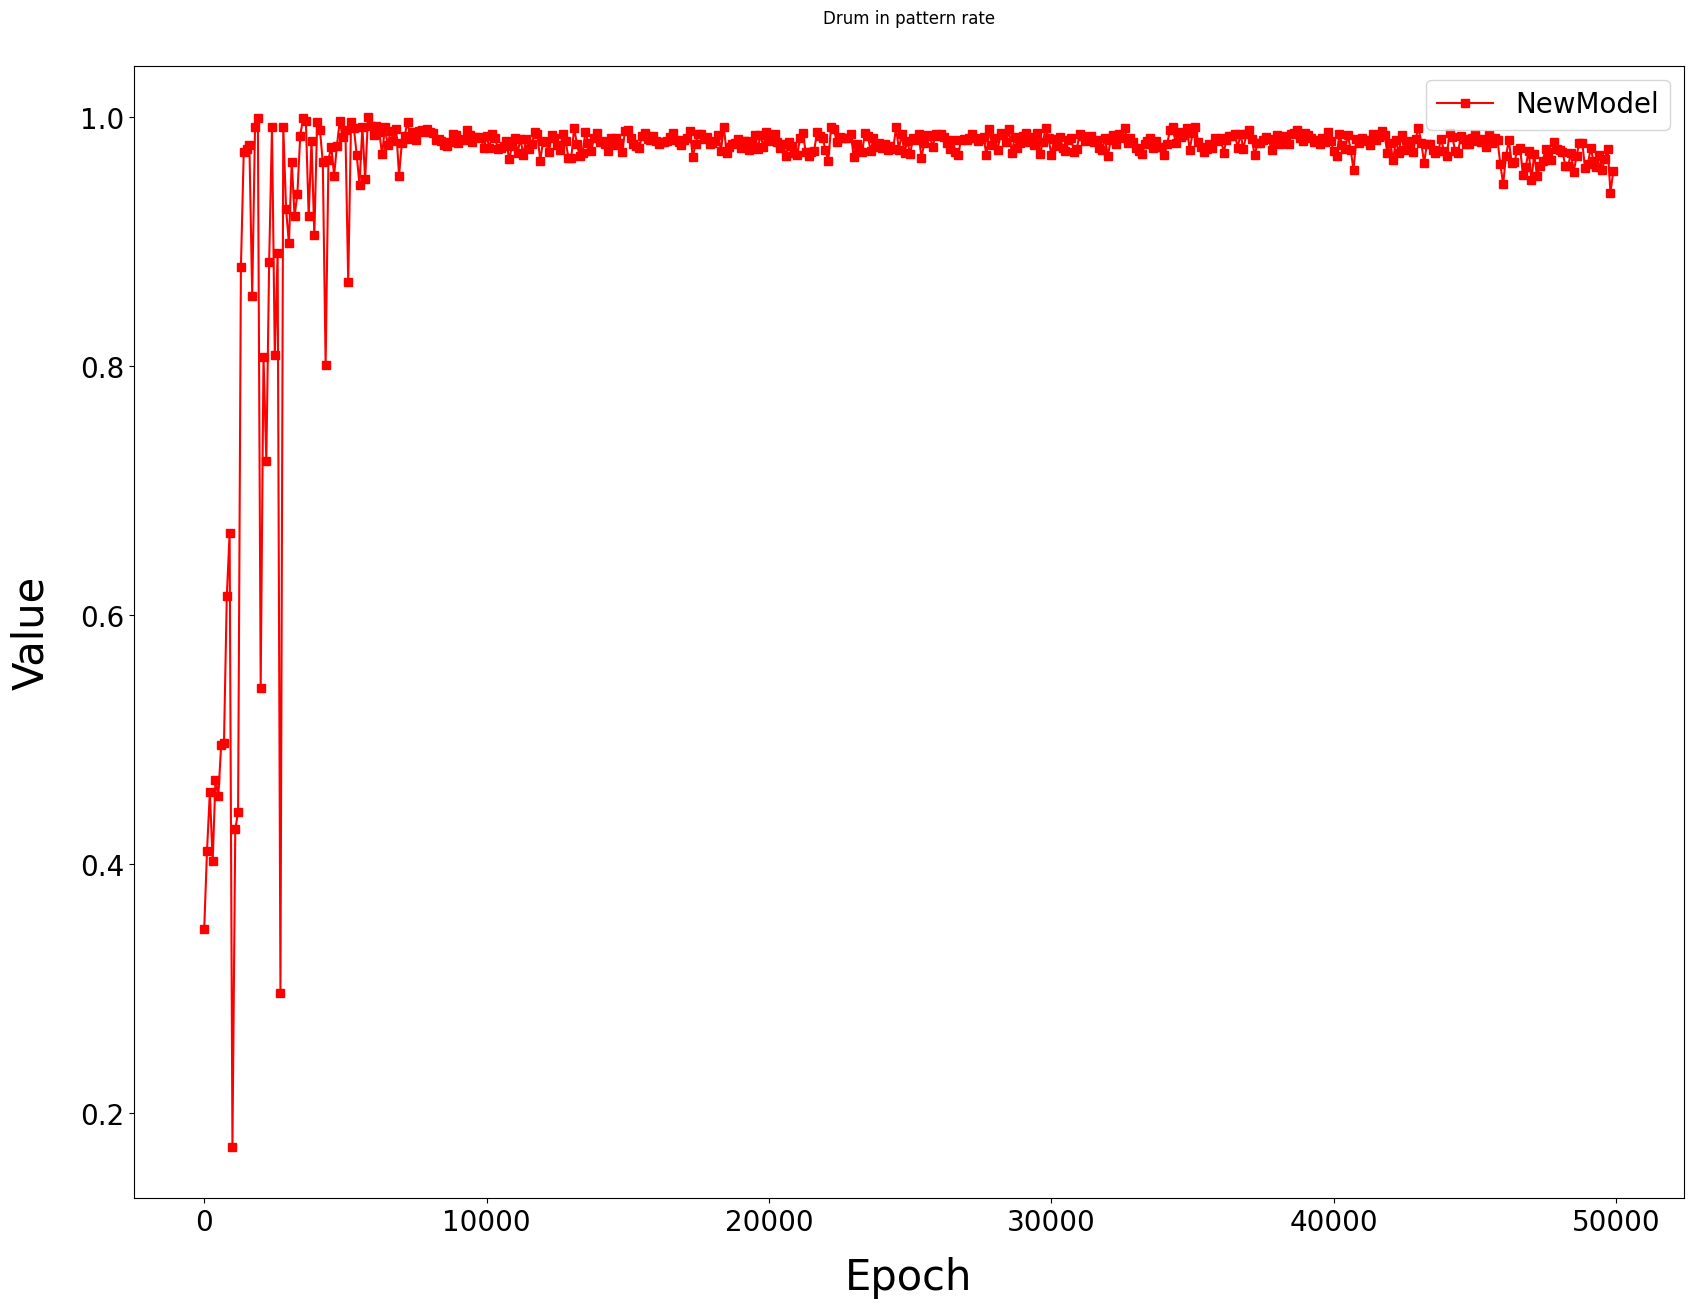

In [35]:
import matplotlib.pyplot as plt

epoch = [x*100 for x in range(len(all_file))]

# 設定圖片大小為長20、寬15
plt.figure(figsize=(20,15),dpi=100,linewidth = 2)

# 把資料放進來並指定對應的X軸、Y軸的資料，用方形做標記(s-)，並指定線條顏色為紅色，使用label標記線條含意
plt.plot(epoch,epochValue,'s-',color = 'r', label="NewModel")

# 設定圖片標題，以及指定字型設定，x代表與圖案最左側的距離，y代表與圖片的距離
plt.title("Drum in pattern rate", x=0.5, y=1.03)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
# 標示x軸(labelpad代表與圖片的距離)
plt.xlabel("Epoch", fontsize=30, labelpad = 15)
# 標示y軸(labelpad代表與圖片的距離)
plt.ylabel("Value", fontsize=30, labelpad = 20)

# 顯示出線條標記位置
plt.legend(loc = "best", fontsize=20)
plt.show()


# Empty Bar Rate

In [5]:
folderPath = './eval_popRock/empty_bar_rate/'
allFiles = gb.glob(folderPath+'*.npy')
baseName = folderPath+'empty_bar_rate_'
endName = '.npy'

newFiles = []

# 整理array
for i in range (len(allFiles)):
  index = allFiles.index(baseName + str(100*(i+1)) + endName)
  newFiles.append(allFiles[index])

epochValue_1 = []
epochValue_2 = []
epochValue_3 = []
epochValue_4 = []
epochValue_5 = []
# 讀取每個epoch的值
for file in newFiles :
  value = np.load(file)
  epochValue_1.append(value[0])
  epochValue_2.append(value[1])
  epochValue_3.append(value[2])
  epochValue_4.append(value[3])
  epochValue_5.append(value[4])

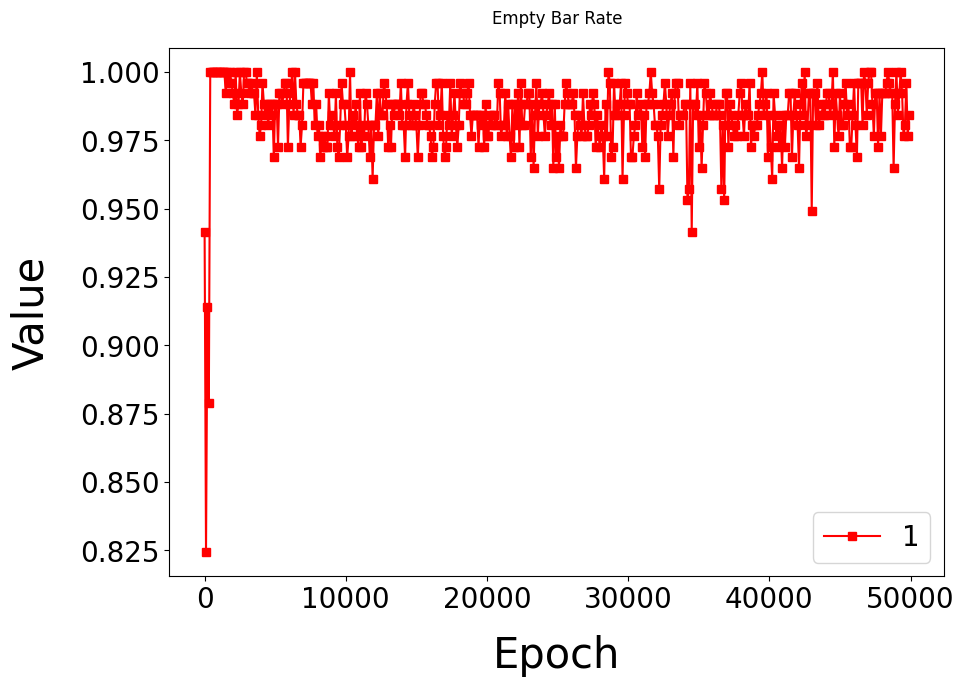

In [11]:
import matplotlib.pyplot as plt

epoch = [x*100 for x in range(len(allFiles))]

# 設定圖片大小為長20、寬15
plt.figure(figsize=(10,7),dpi=100,linewidth = 2)

# 把資料放進來並指定對應的X軸、Y軸的資料，用方形做標記(s-)，並指定線條顏色為紅色，使用label標記線條含意
plt.plot(epoch,epochValue_1,'s-',color = 'r', label="1")

# 設定圖片標題，以及指定字型設定，x代表與圖案最左側的距離，y代表與圖片的距離
plt.title("Empty Bar Rate", x=0.5, y=1.03)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
# 標示x軸(labelpad代表與圖片的距離)
plt.xlabel("Epoch", fontsize=30, labelpad = 15)
# 標示y軸(labelpad代表與圖片的距離)
plt.ylabel("Value", fontsize=30, labelpad = 20)

# 顯示出線條標記位置
plt.legend(loc = "best", fontsize=20)
plt.show()

# In Scale Ratio


In [19]:
folderPath = './eval_popRock/in_scale_ratio/'
allFiles = gb.glob(folderPath+'*.npy')
baseName = folderPath+'in_scale_ratio_'
endName = '.npy'

newFiles = []

# 整理array
for i in range (len(allFiles)):
  index = allFiles.index(baseName + str(100*(i+1)) + endName)
  newFiles.append(allFiles[index])

epochValue_1 = []
epochValue_2 = []
epochValue_3 = []
epochValue_4 = []
epochValue_5 = []
# 讀取每個epoch的值
for file in newFiles :
  value = np.load(file)
  epochValue_1.append(value[0])
  epochValue_2.append(value[1])
  epochValue_3.append(value[2])
  epochValue_4.append(value[3])
  epochValue_5.append(value[4])

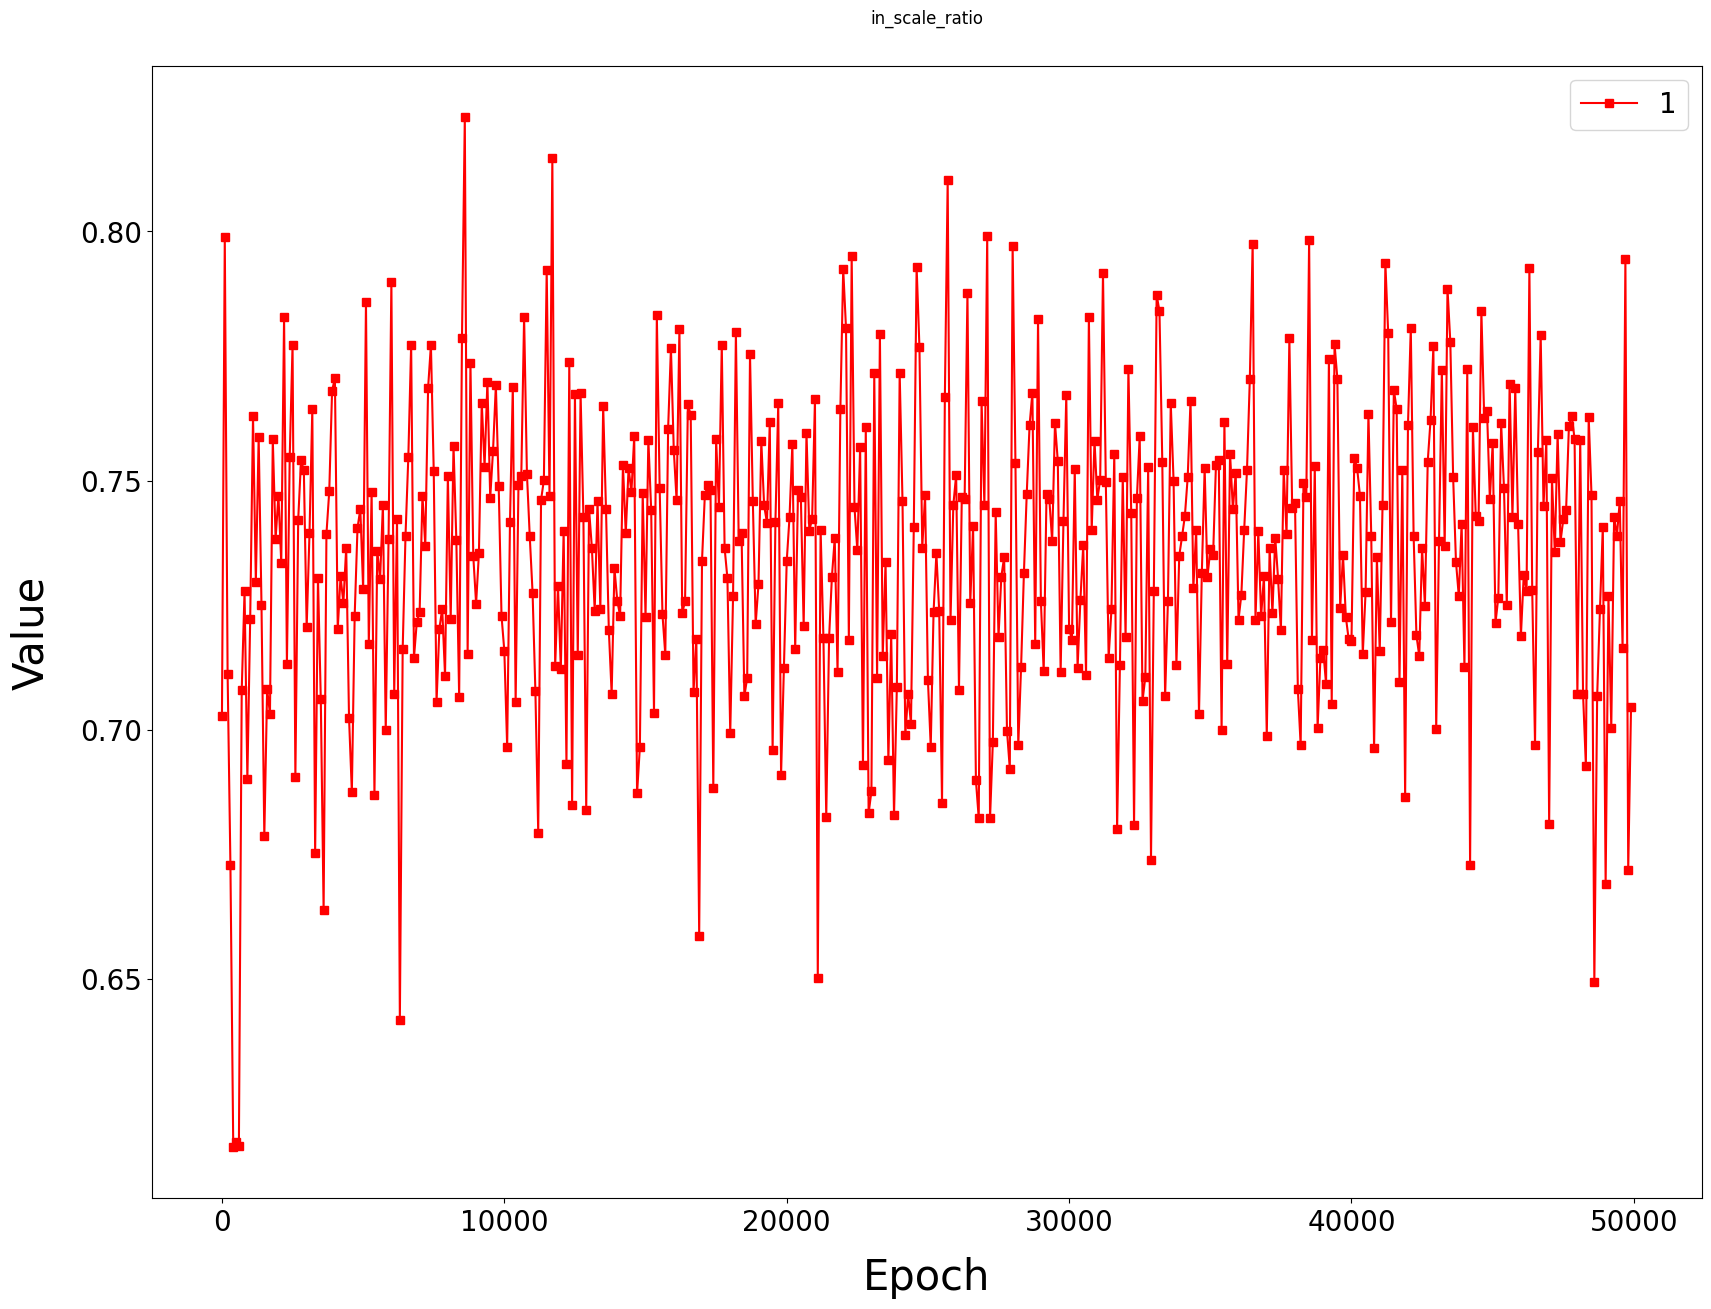

In [23]:
import matplotlib.pyplot as plt

epoch = [x*100 for x in range(len(allFiles))]

# 設定圖片大小為長20、寬15
plt.figure(figsize=(20,15),dpi=100,linewidth = 2)

# 把資料放進來並指定對應的X軸、Y軸的資料，用方形做標記(s-)，並指定線條顏色為紅色，使用label標記線條含意
plt.plot(epoch,epochValue_5,'s-',color = 'r', label="1")

# 設定圖片標題，以及指定字型設定，x代表與圖案最左側的距離，y代表與圖片的距離
plt.title("in_scale_ratio", x=0.5, y=1.03)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
# 標示x軸(labelpad代表與圖片的距離)
plt.xlabel("Epoch", fontsize=30, labelpad = 15)
# 標示y軸(labelpad代表與圖片的距離)
plt.ylabel("Value", fontsize=30, labelpad = 20)

# 顯示出線條標記位置
plt.legend(loc = "best", fontsize=20)
plt.show()

# n_pitches_used

In [25]:
folderPath = './eval_popRock/n_pitches_used/'
allFiles = gb.glob(folderPath+'*.npy')
baseName = folderPath+'n_pitches_used_'
endName = '.npy'

newFiles = []

# 整理array
for i in range (len(allFiles)):
  index = allFiles.index(baseName + str(100*(i+1)) + endName)
  newFiles.append(allFiles[index])

# print(np.load(newFiles[0]))

epochValue_1 = []
epochValue_2 = []
epochValue_3 = []
epochValue_4 = []
epochValue_5 = []
# 讀取每個epoch的值
for file in newFiles :
  value = np.load(file)
  epochValue_1.append(value[0])
  epochValue_2.append(value[1])
  epochValue_3.append(value[2])
  epochValue_4.append(value[3])
  epochValue_5.append(value[4])

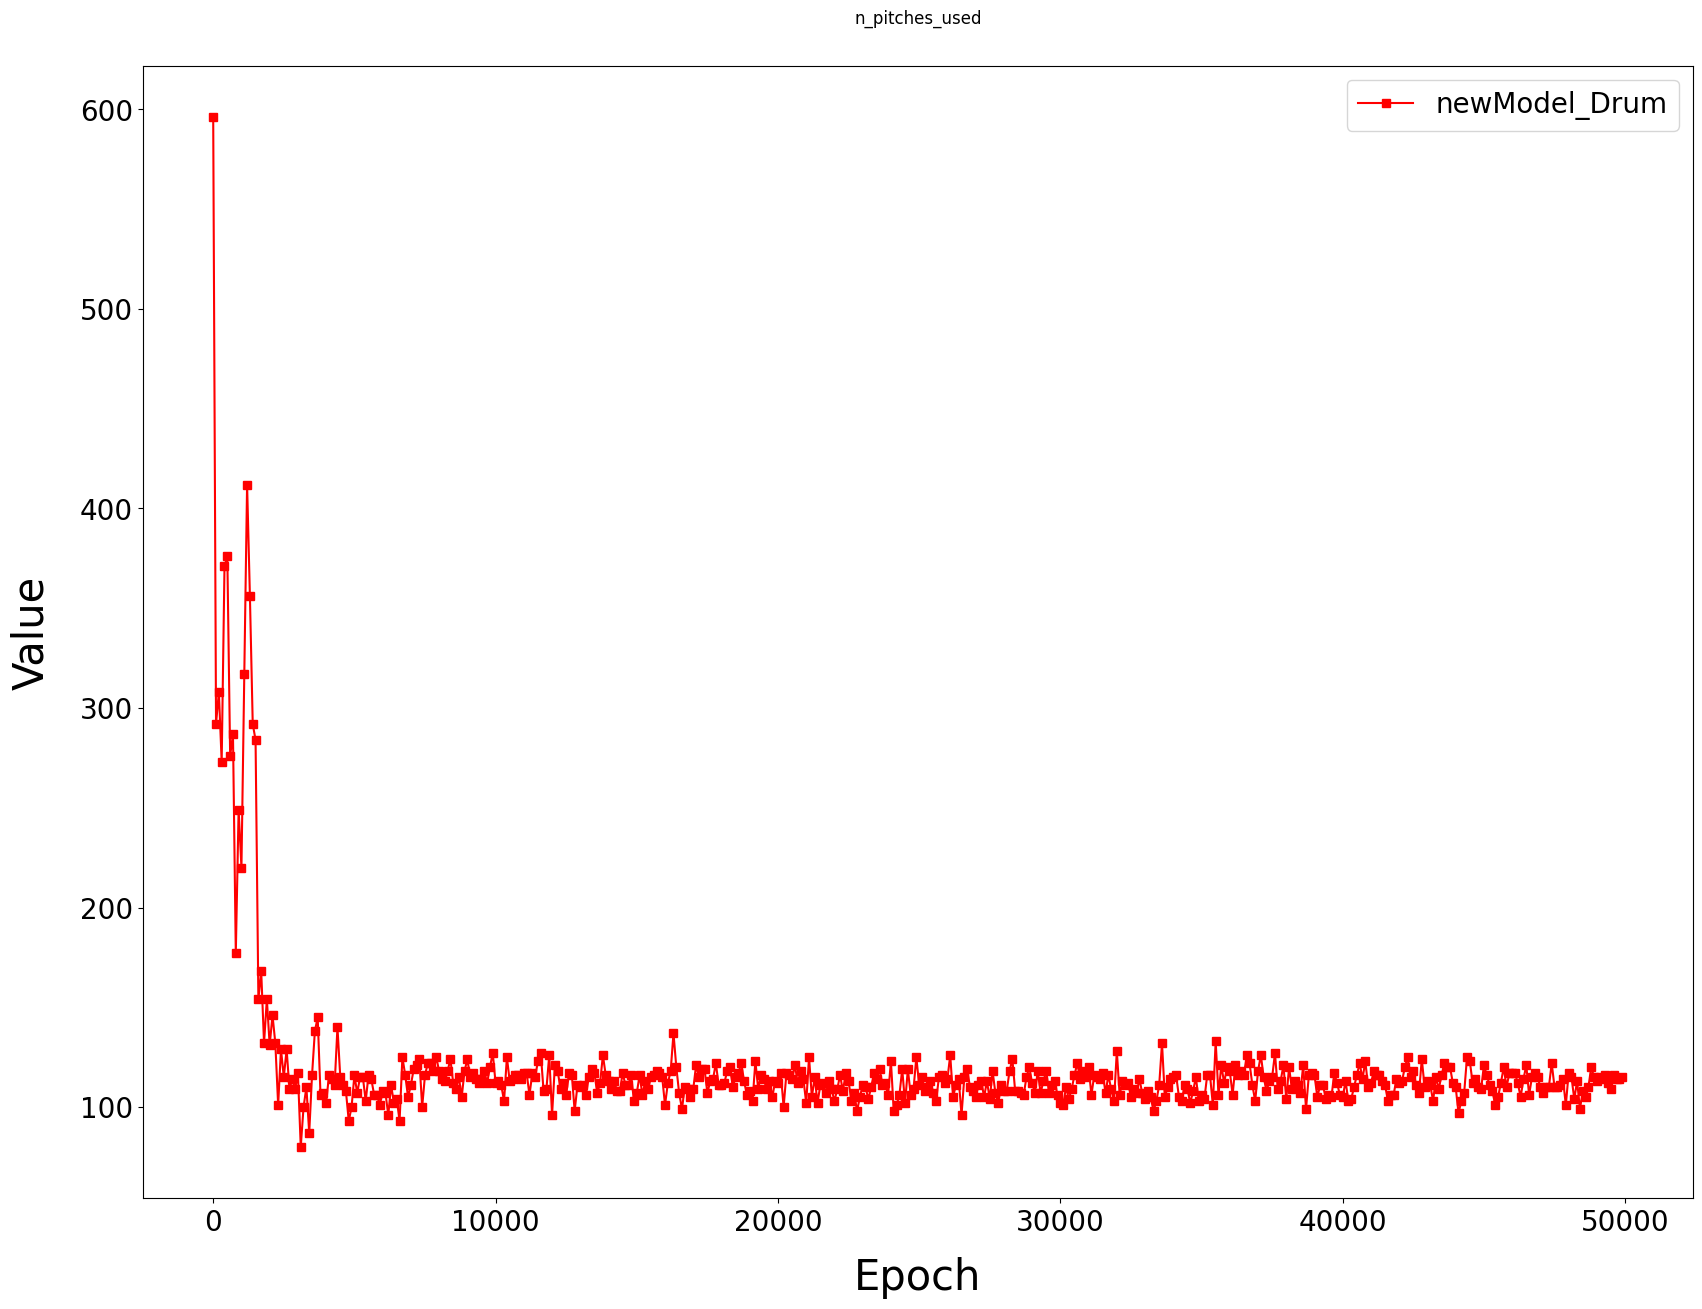

In [28]:
import matplotlib.pyplot as plt

epoch = [x*100 for x in range(len(allFiles))]

# 設定圖片大小為長20、寬15
plt.figure(figsize=(20,15),dpi=100,linewidth = 2)

# 把資料放進來並指定對應的X軸、Y軸的資料，用方形做標記(s-)，並指定線條顏色為紅色，使用label標記線條含意
plt.plot(epoch,epochValue_2,'s-',color = 'r', label="newModel_Piano")

# 設定圖片標題，以及指定字型設定，x代表與圖案最左側的距離，y代表與圖片的距離
plt.title("n_pitches_used", x=0.5, y=1.03)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
# 標示x軸(labelpad代表與圖片的距離)
plt.xlabel("Epoch", fontsize=30, labelpad = 15)
# 標示y軸(labelpad代表與圖片的距離)
plt.ylabel("Value", fontsize=30, labelpad = 20)

# 顯示出線條標記位置
plt.legend(loc = "best", fontsize=20)
plt.show()

# polyphonic_rate